In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# cross validation 
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# hyper-parameter tuning
from sklearn.grid_search import GridSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OneHotEncoder

# linear models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ensemble models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

# pipeline
from sklearn.pipeline import Pipeline

# Load data

In [2]:
# load train_data and test_data
train_data = pd.read_json("../Dataset/train.json")
test_data = pd.read_json("../Dataset/test.json")

In [3]:
# train data
train_data.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [4]:
# test data
test_data.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street


In [5]:
# shape of train and test data
print("Shape of train data: {}".format(train_data.shape))
print("Shape of test data: {}".format(test_data.shape))

Shape of train data: (49352, 15)
Shape of test data: (74659, 14)


# Train dataset information

In [6]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
# print train_data types
train_data.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [8]:
# obtain numeric train_data only
numeric_train_data = train_data._get_numeric_data()

In [9]:
# preview numeric train_data
numeric_train_data.head(3)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
10,1.5,3,40.7145,7211212,-73.9425,3000
10000,1.0,2,40.7947,7150865,-73.9667,5465
100004,1.0,1,40.7388,6887163,-74.0018,2850


In [10]:
# obtain non numeric train_data
non_numeric = ["object"]
# train data
non_numeric_train_data = train_data.select_dtypes(include=non_numeric)

In [11]:
# preview non numeric train_data
non_numeric_train_data.head(3)

,building_id,created,description,display_address,features,interest_level,manager_id,photos,street_address
10,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,792 Metropolitan Avenue
10000,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,808 Columbus Avenue
100004,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,241 W 13 Street


# Test dataset information

In [12]:
test_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,74659.000000,74659.000000,74659.000000,7.465900e+04,74659.000000,7.465900e+04
mean,1.212915,1.544663,40.735060,7.024001e+06,-73.945282,3.749033e+03
std,0.649820,1.107014,0.806687,1.264496e+05,1.487795,9.713092e+03
min,0.000000,0.000000,0.000000,6.811958e+06,-121.488000,1.000000e+00
25%,1.000000,1.000000,40.727800,6.915516e+06,-73.991800,2.495000e+03
50%,1.000000,1.000000,40.751600,7.021738e+06,-73.977700,3.150000e+03
75%,1.000000,2.000000,40.774300,7.129166e+06,-73.954700,4.100000e+03
max,112.000000,7.000000,42.872700,7.761779e+06,0.000000,1.675000e+06


In [13]:
# obtain numeric test_data only
numeric_test_data = test_data._get_numeric_data()

In [14]:
# print test_data types
test_data.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [15]:
# obtain numeric test_data only
numeric_test_data = test_data._get_numeric_data()

In [16]:
# preview numeric test_data
numeric_test_data.head(3)

,bathrooms,bedrooms,latitude,listing_id,longitude,price
0,1.0,1,40.7185,7142618,-73.9865,2950
1,1.0,2,40.7278,7210040,-74.0000,2850
100,1.0,1,40.7306,7103890,-73.9890,3758


In [17]:
# obtain non numeric train_data
non_numeric = ["object"]
# test data
non_numeric_test_data = test_data.select_dtypes(include=non_numeric)

In [18]:
# preview non numeric train_data
non_numeric_test_data.head(3)

,building_id,created,description,display_address,features,manager_id,photos,street_address
0,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,99 Suffolk Street
1,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,176 Thompson Street
100,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,101 East 10th Street


# Feature engineering

In [19]:
# count of photos #
non_numeric_train_data["num_photos"] = non_numeric_train_data["photos"].apply(len)
non_numeric_test_data["num_photos"] = non_numeric_test_data["photos"].apply(len)

# count of "features" #
non_numeric_train_data["num_features"] = non_numeric_train_data["features"].apply(len)
non_numeric_test_data["num_features"] = non_numeric_test_data["features"].apply(len)

# count of words present in description column #
non_numeric_train_data["num_description_words"] = non_numeric_train_data["description"].apply(lambda x: len(x.split(" ")))
non_numeric_test_data["num_description_words"] = non_numeric_test_data["description"].apply(lambda x: len(x.split(" ")))

/Users/firdause/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/firdause/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/firdause/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [20]:
# drop unncessary columns
# for train and test data
features_drop = ["building_id", "created", "description", "display_address", "features", "manager_id", "photos", "street_address"]

dropped_train_data = non_numeric_train_data.drop(features_drop, axis=1)
dropped_test_data = non_numeric_test_data.drop(features_drop, axis=1)

In [21]:
dropped_train_data.head(3)

,interest_level,num_photos,num_features,num_description_words
10,medium,5,0,95
10000,low,11,5,9
100004,high,8,4,94


In [22]:
dropped_train_data.shape

(49352, 4)

In [23]:
# encoder = LabelEncoder()
# target = dropped_train_data["interest_level"]
# y_train = encoder.fit_transform(target)

# map interest level with numbers
y_map = {"high": 0, "medium": 1, "low": 2}
y_train = dropped_train_data["interest_level"].apply(lambda x: y_map[x])

In [24]:
drop_target = ["interest_level"]
preproc_dropped_train_data = dropped_train_data.drop(drop_target, axis=1)

In [25]:
preproc_dropped_train_data.head(3)

,num_photos,num_features,num_description_words
10,5,0,95
10000,11,5,9
100004,8,4,94


In [26]:
preproc_dropped_train_data.describe()

,num_photos,num_features,num_description_words
count,49352.000000,49352.000000,49352.000000
mean,5.606946,5.428473,90.138272
std,3.632283,3.923411,59.394230
min,0.000000,0.000000,1.000000
25%,4.000000,2.000000,50.000000
50%,5.000000,5.000000,83.000000
75%,7.000000,8.000000,120.000000
max,68.000000,39.000000,667.000000


In [27]:
# final preprocessed train dataset
# frames_train = [numeric_train_data, preproc_dropped_train_data]
X_train = numeric_train_data.join(preproc_dropped_train_data)
X_train = X_train.drop("listing_id", axis=1)

# final preprocessed test dataset
# frames_test = [numeric_test_data, dropped_test_data]
X_test = numeric_test_data.join(dropped_test_data)

In [28]:
X_train.head()

,bathrooms,bedrooms,latitude,longitude,price,num_photos,num_features,num_description_words
10,1.5,3,40.7145,-73.9425,3000,5,0,95
10000,1.0,2,40.7947,-73.9667,5465,11,5,9
100004,1.0,1,40.7388,-74.0018,2850,8,4,94
100007,1.0,1,40.7539,-73.9677,3275,3,2,80
100013,1.0,4,40.8241,-73.9493,3350,3,1,68


In [29]:
X_test.head()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,num_photos,num_features,num_description_words
0,1.0,1,40.7185,7142618,-73.9865,2950,8,6,78
1,1.0,2,40.7278,7210040,-74.0000,2850,3,3,35
100,1.0,1,40.7306,7103890,-73.9890,3758,6,3,333
1000,1.0,2,40.7109,7143442,-73.9571,3300,6,10,204
100000,2.0,2,40.7650,6860601,-73.9845,4900,7,14,174


In [30]:
# Train and test shape
print("X_train shape: {}".format(X_train.shape))
print("y_train shape {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (49352, 8)
y_train shape (49352,)
X_test shape: (74659, 9)


# Build our model 

In [31]:
# Test options and evaluation metric
num_folds = 10
scoring = "accuracy"

# linear and non-linear algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.687226 (0.006673)
LDA: 0.694278 (0.006446)
KNN: 0.648120 (0.008137)
CART: 0.655941 (0.006583)
NB: 0.288195 (0.021119)
SVM: 0.697702 (0.007384)


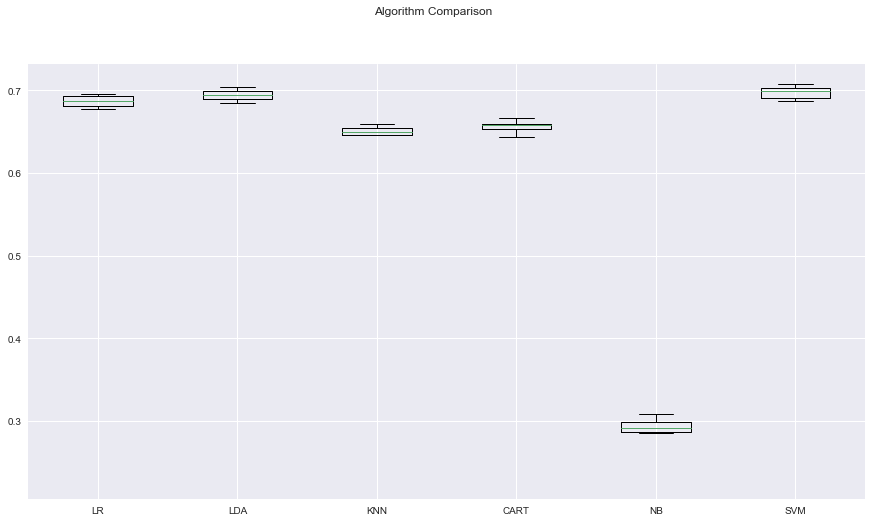

In [32]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()),("LR", LogisticRegression())])))
pipelines.append(("ScaledLDA", Pipeline([("Scaler", StandardScaler()),("LDA", LinearDiscriminantAnalysis())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()),("KNN", KNeighborsClassifier())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()),("CART", DecisionTreeClassifier())])))
pipelines.append(("ScaledNB", Pipeline([("Scaler", StandardScaler()),("NB", GaussianNB())])))
pipelines.append(("ScaledSVM", Pipeline([("Scaler", StandardScaler()),("SVM", SVC())])))

results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.688807 (0.006501)
ScaledLDA: 0.694278 (0.006446)
ScaledKNN: 0.644189 (0.006525)
ScaledCART: 0.655860 (0.006787)
ScaledNB: 0.135801 (0.047187)
ScaledSVM: 0.694683 (0.006454)


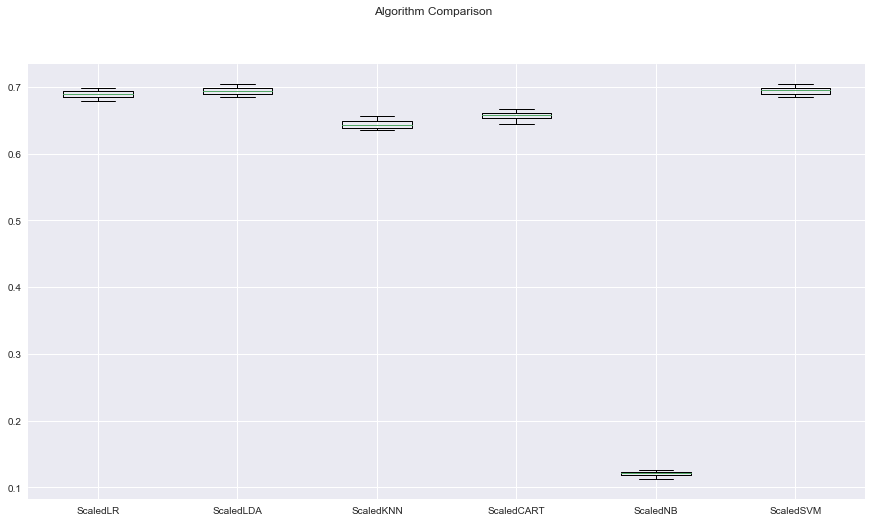

In [34]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# ensembles
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))

results = []
names = []

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.707185 (0.006388)
GBM: 0.715716 (0.007238)
RF: 0.707976 (0.006702)
ET: 0.697135 (0.007193)


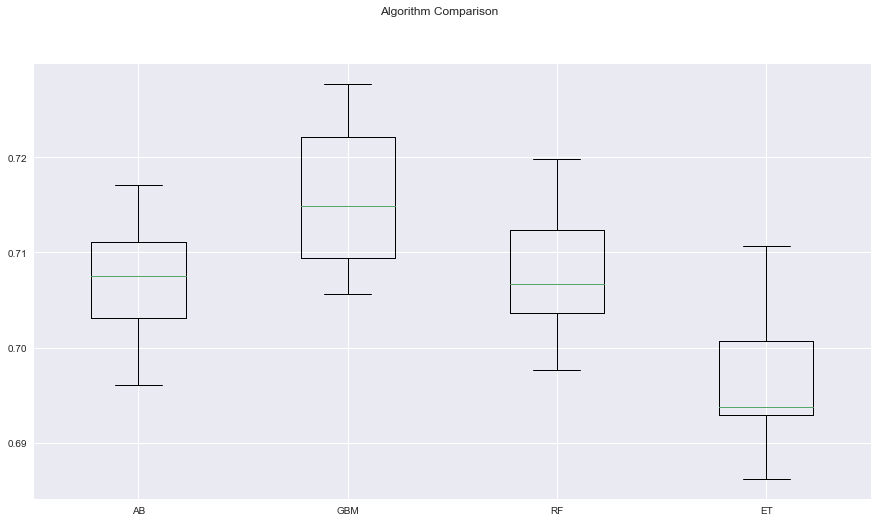

In [36]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledAB", Pipeline([("Scaler", StandardScaler()),("AB", AdaBoostClassifier())])))
pipelines.append(("ScaledGBM", Pipeline([("Scaler", StandardScaler()),("GBM", GradientBoostingClassifier())])))
pipelines.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()),("RF", RandomForestClassifier())])))
pipelines.append(("ScaledET", Pipeline([("Scaler", StandardScaler()),("ET", ExtraTreesClassifier())])))

results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=666)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: 0.707185 (0.006388)
ScaledGBM: 0.715716 (0.007238)
ScaledRF: 0.708138 (0.006604)
ScaledET: 0.697257 (0.004796)


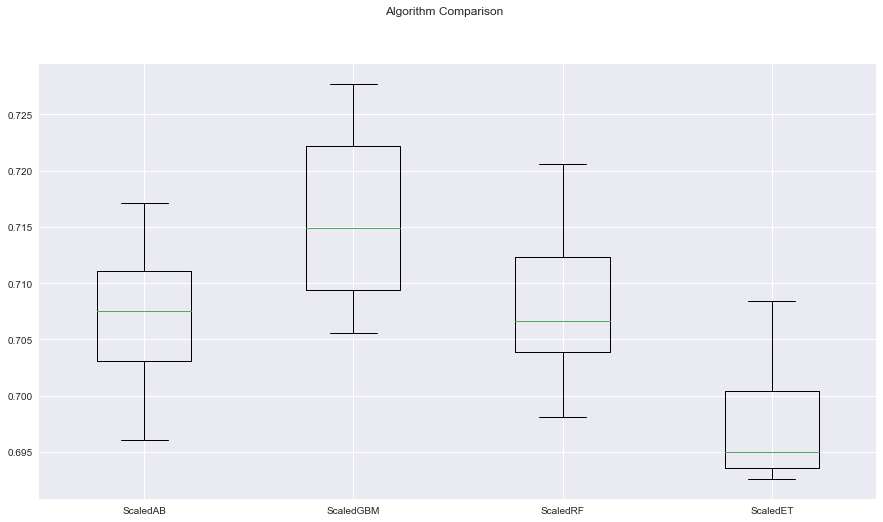

In [38]:
# Compare Algorithms
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Hyperparameter tuning via GridSearchCV

In [ ]:
# tune gradient boosting classifier
loss_values = ["deviance"]
lr_values = [0.1, 0.01]
n_values = [200, 250, 300]
max_values = [6, 7, 8]

# Best: 0.729515 using {'n_estimators': 200, 'loss': 'deviance', 'learning_rate': 0.1, 'max_depth': 6}

scoring = "accuracy"

param_grid = dict(loss=loss_values, 
                  learning_rate=lr_values, 
                  n_estimators=n_values, 
                  max_depth=max_values)

model = GradientBoostingClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 18 candidates, totalling 180 fits


# Submission to Kaggle

In [42]:
preproc_X_test = X_test.drop("listing_id", axis=1)
actual_prediction = grid_result.predict_proba(preproc_X_test)

results_dataframe = pd.DataFrame({"listing_id": X_test["listing_id"],
                                  "high": actual_prediction[:, 0],
                                  "medium": actual_prediction[:, 1],
                                  "low": actual_prediction[:, 2]
                                })

results_dataframe.to_csv("two_sigma_connect_sub_1.csv", index = False)